<a href="https://colab.research.google.com/github/MariaVictoriaCabrera/Human-Resources-Data-Science-Project/blob/main/Human_Resources_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Resources Project
---

María Victoria Cabrera

[Used Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)


**Context**: Hiring and employee retention in the business environment.

**Objetive**: Predict which employees are more likely to leave the company or seek another job.


**Dictionary**
* Age: Employee's age (data type: integer).
* Attrition: Attrition, indicating whether the employee left the company (data type: object).
* BusinessTravel: Employee's business travel frequency (data type: object).
* DailyRate: Employee's daily rate (data type: integer).
* Department: Department to which the employee belongs (data type: object).
* DistanceFromHome: Distance from home to the workplace (data type: integer).
* Education: Employee's education level (data type: integer).

 >  1.   'Below College'
 >  2.   'College'
 >  3.   'Bachelor'
 >  4.   'Master'
 >  5.   'Doctor'

* EducationField: Employee's field of study or specialization (data type: object).
* EmployeeCount: Number of employees (constant, always 1470) (data type: integer).
* EmployeeNumber: Unique identification number of the employee (data type: integer).
* EnvironmentSatisfaction: Level of satisfaction with the work environment (data type: integer).

 >  1.   'Low'
 >  2.   'Medium'
 >  3.   'High'
 >  4.   'Very High'

* Gender: Employee's gender (data type: object).
* HourlyRate:  Employee's hourly rate (data type: integer).
* JobInvolvement: Level of involvement in the job (data type: integer).

 >  1.   'Low'
 >  2.   'Medium'
 >  3.   'High'
 >  4.   'Very High'

* JobLevel: Employee's job level (data type: integer).
* JobRole: Employee's job role or position (data type: object).
* JobSatisfaction:  Level of job satisfaction (data type: integer).

 >  1.   'Low'
 >  2.   'Medium'
 >  3.   'High'
 >  4.   'Very High'

* MaritalStatus: Employee's marital status (data type: object).
* MonthlyIncome: Employee's monthly income (data type: integer).
* MonthlyRate: Employee's monthly rate (data type: integer).
* NumCompaniesWorked:  Number of companies the employee has worked for (data type: integer).
* Over18: Indicator of whether the employee is over 18 years old (constant, always "Y") (data type: object).
* OverTime:  Indicator of whether the employee works overtime (data type: object).
* PercentSalaryHike: Percentage of salary increase (data type: integer).
* PerformanceRating: Employee's performance rating (data type: integer).

 >  1.   'Low'
 >  2.   'Good'
 >  3.   'Excellent'
 >  4.   'Outstanding'

* RelationshipSatisfaction: Level of satisfaction in interpersonal relationships (data type: integer).

 >  1.   'Low'
 >  2.   'Medium'
 >  3.   'High'
 >  4.   'Very High'


* StandardHours: Standard working hours (constant, always 1470) (data type: integer).
* StockOptionLevel: Employee's stock option level (data type: integer).
* TotalWorkingYears: Total number of years worked (data type: integer).
* TrainingTimesLastYear: Number of times the employee received training last year (data type: integer).
* WorkLifeBalance: Balance between work and personal life of the employee (data type: integer).

 >  1.  'Bad'  
 >  2.  'Good'
 >  3.  'Better'  
 >  4.  'Best'

* YearsAtCompany: Years worked in the current company (data type: integer).
* YearsInCurrentRole: Years in the current role (data type: integer).
* YearsSinceLastPromotion: Years since the last promotion (data type: integer).
* YearsWithCurrManager:  Years working with the current manager (data type: integer).


## Research Hypotheses and Interests

**Hypotheses**

Employees with lower levels of job satisfaction, work-life balance, and interpersonal relationships, as well as those who frequently work overtime, are more likely to leave the company.

**Research Interests**


*   Identification of Critical Indicators:
   > Explore which variables in the dataset have the greatest influence on predicting employee attrition, identifying the most critical indicators for workforce retention.

*   Employee Segmentation:
    > Analyze if there are specific attrition patterns for different employee segments (e.g., job roles, educational levels, etc.) to tailor retention strategies more effectively.

## Exploration of the Dataset

### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Potenciales data sets TP final/Recursos Humanos - Personal/DATAHR.csv', sep=';')

### Initial Exploration Steps

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,3,1,0,6,3,4,4,3,1,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Preparation and Transformation

### Detection of Missing Data

In [ ]:
num_missing = df.isna().sum()

columns_with_missing = num_missing[num_missing > 0]

columns_with_no_missing = num_missing[num_missing == 0]

print("Columns with Missing Values:")
print(columns_with_missing)

Columns with Missing Values:
Series([], dtype: int64)


The dataset does not contain any null values in any of its columns.

### Detection of Outliers

In [ ]:
df.kurt(numeric_only=True)[:10]

Age                       -0.404145
DailyRate                 -1.203823
DistanceFromHome          -0.224833
Education                 -0.559115
EmployeeCount              0.000000
EmployeeNumber            -1.223179
EnvironmentSatisfaction   -1.202521
HourlyRate                -1.196398
JobInvolvement             0.270999
JobLevel                   0.399152
dtype: float64

No noticeable kurtosis values imply dispersed or distant values from the center of the variable. The majority of values are less than 0, indicating a relatively flat distribution. EmployeeCount shows a normal distribution with a value of 0.00, while JobInvolvement and JobLevel are the only ones with a relatively high distribution, with values of 0.270999 and 0.399152, respectively.

In [ ]:
df['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

We examine the descriptive statistics of the variable with the highest distribution and find no inconsistencies. The minimum value is 1.00, the maximum is 5.00, and the mean is 2.063946. These values align with expectations, considering that an employee's job level can range from 1 to 5.

### Detection and Handling of Unnecessary Values

**Repeated Values**




In [ ]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

EmployeeCount: 100.00%
1    1470
Name: EmployeeCount, dtype: int64

Over18: 100.00%
Y    1470
Name: Over18, dtype: int64

StandardHours: 100.00%
80    1470
Name: StandardHours, dtype: int64



Upon generating a list of columns with more than 99.9% of rows having the same value, we identified 3 constant variables that hold no value for our research interests. Ultimately, we decided to remove them.

In [ ]:
columns_drop = ['StandardHours', 'Over18', 'EmployeeCount']

df = df.drop(columns_drop, axis=1)

print("\nDataset after removing the columns:")
print(df.columns)


Dataset after removing the columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


**Irrelevant Values**


We found that the variables "Gender" and "MaritalStatus" are not relevant to the research interests. While factors like gender and marital status may have an impact on attrition, it's also essential to consider ethical sensitivity when including these attributes in predictive models. We have decided to remove them.

In [ ]:
columns_drop = ['Gender', 'MaritalStatus']

df = df.drop(columns_drop, axis=1)

print("\nDataset after removing the columns:")
print(df.columns)


Dataset after removing the columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Similarly, we found that "EmployeeNumber" is merely a unique identifier assigned to each employee and does not contribute valuable information to the analysis.

Furthermore, in some cases, including unique identifiers in predictive models can lead to overfitting, especially if the model starts memorizing specific patterns of identifiers rather than learning general patterns.

In [ ]:
df = df.drop('EmployeeNumber', axis=1)

print("\nDataset after removing the columns:")
print(df.columns)


Dataset after removing the columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


**Duplicate Rows**

In [ ]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager



No Duplicate Records Detected

### Detection of Inconsistent Values

We verify that there is no inconsistent capitalization in the columns of type Object by counting unique variables.

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

for columns in object_columns:
    print(f"\nUnique values in '{columns}':")
    print(df[columns].value_counts(dropna=False))


Unique values in 'Attrition':
No     1233
Yes     237
Name: Attrition, dtype: int64

Unique values in 'BusinessTravel':
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Unique values in 'Department':
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Unique values in 'EducationField':
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Unique values in 'JobRole':
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Unique values in 'OverTime':
No     1054
Ye

## Data Visualization Phase

In [ ]:
fig = px.violin(df, x='Attrition', y='Age', color='Attrition',
                box=True, points="all",
                title='Age distribution according to Attrition',
                labels={'Age': 'Age', 'Attrition': 'Attrition'},
                color_discrete_map={'No': '#115f9a', 'Yes': '#a6d75b'},
                category_orders={'Attrition': ['No', 'Yes']},
                width=800, height=500)

fig.update_layout( yaxis=dict(tickmode='linear', tick0=0, dtick=5))

fig.show()

In [ ]:
fig = px.box(df, x='Education', y='MonthlyIncome', color='Education',
             title='Monthly Income according to Educational Level',
             labels={'MonthlyIncome': 'Monthly Income', 'Education': 'Education'},
             category_orders={'Education': [1, 2, 3, 4, 5]},
             color_discrete_map={1: '#115f9a', 2: '#48b5c4', 3: '#76c68f', 4:'#a6d75b', 5: '#d0f400'},
             width=800, height=500)

fig.update_layout(legend_title=None)

fig.show()

In [ ]:
attrition_percentage = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
attrition_percentage = attrition_percentage.sort_values(by=['Attrition', 'Percentage'], ascending=[True, False])

fig = px.bar(attrition_percentage, x='JobRole', y='Percentage', color='Attrition',
             title='Attrition Percentage According to Job Role',
             labels={'Percentage': 'Attrition percentage', 'JobRole': 'Job Role', 'Attrition': 'Attrition'},
             category_orders={'JobRole': attrition_percentage['JobRole'].tolist()},
             color_discrete_map={'No': '#115f9a', 'Yes': '#d0f400'},
             width=800, height=500)

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(len(attrition_percentage))), ticktext=attrition_percentage['JobRole'].tolist()),
                  xaxis_title='Job Role',
                  yaxis_title='Attrition percentage',
                  legend_title='Attrition',
                  legend=dict(x=1, y=1, traceorder='normal'))

fig.show()

In [ ]:
percentage_attrition_department = (df.groupby('Department')['Attrition'].value_counts(normalize=True) * 100).unstack(fill_value=0).reset_index()

fig = px.bar(percentage_attrition_department, x='Department', y=['No', 'Yes'],
             title='Attrition Percentage by Department',
             labels={'value': 'Department', 'variable': 'Attrition', 'Department': 'Department'},
             color_discrete_map={'No': 'blue', 'Yes': 'orange'},
             barmode='stack')

fig.update_layout(width=800, height=500,
                  xaxis_title='Department',
                  yaxis_title='Percentage',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10),
                  legend_title='Attrition',
                  legend=dict(x=1, y=1, traceorder='normal'),
                  xaxis_tickangle=-45)

fig.show()

According to the last two graphs, the Sales department and the position of Sales Representative have the highest attrition percentage.

In [ ]:
fig = px.box(df, x='WorkLifeBalance', y='DistanceFromHome', color='WorkLifeBalance',
             title='Relationship Between Work-Life Balance and Distance From Home',
             labels={'DistanceFromHome': 'Distance From Home', 'WorkLifeBalance': 'Work-Life Balance'},
             category_orders={'WorkLifeBalance': df['WorkLifeBalance'].unique()},
             color_discrete_map={'1': 'viridis', '2': 'viridis', '3': 'viridis', '4': 'viridis'},
             width=800, height=500)

fig.update_layout(legend_title=None)

fig.show()

We observe that employees with better work-life balance also have the shortest distance between the office and home.

In [ ]:
percentage_overtime = df.groupby('WorkLifeBalance')['OverTime'].value_counts(normalize=True).unstack() * 100

percentage_overtime = percentage_overtime.reset_index()

fig = px.bar(percentage_overtime, x='WorkLifeBalance', y=['No', 'Yes'],
             title='Percentage of Employees with Overtime by Work-Life Balance Level',
             labels={'value': 'Percentage of Employees', 'variable': 'OverTime'},
             color_discrete_map={'No': '#115f9a', 'Yes': '#d0f400'},
             barmode='stack')

fig.update_layout(width=800, height=500,
                  xaxis_title='Work-Life Balance',
                  yaxis_title='Percentage of Employees',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10),
                  legend_title='OverTime',
                  legend=dict(x=1, y=1, traceorder='normal'))

fig.show()


Considering what was observed in the two upper graphs, we conclude that the group of employees with a better work-life balance has the lowest percentage of positive Overtime and the shortest distance between the office and home.

In [ ]:
percentage_worklifebalance_attrition = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack(fill_value=0).apply(lambda x: x / x.sum() * 100, axis=1).reset_index()

fig = px.bar(percentage_worklifebalance_attrition, x='WorkLifeBalance', y=['No', 'Yes'],
             title='Percentage of Employees with Work-Life Balance by Attrition',
             labels={'value': 'Percentage of Employees', 'variable': 'Attrition', 'WorkLifeBalance': 'WorkLifeBalance'},
             color_discrete_map={'No': '#115f9a', 'Yes': '#d0f400'},
             barmode='stack')

fig.update_layout(xaxis_title='Work-Life Balance',
                  yaxis_title='Percentage of Employees',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10),
                  legend_title='Attrition',
                  legend=dict(x=1, y=1, traceorder='normal'))

fig.show()

It was believed that the higher the work-life balance, the lower the percentage of positive attrition. Following the hypothesis, the group of employees with a balance level of 1 has the highest percentage of positive attrition. However, those with a balance level of 4 have the third-highest percentage of negative attrition, meaning that employees with a balance of level 2 and 3 have higher negative attrition.

It can be concluded that an imbalance between personal and work life may lead an employee to leave the company. However, a balanced life does not guarantee that the employee will not seek another job.

In [ ]:
percentage_environment_satisfaction_attrition = (df.groupby(['EnvironmentSatisfaction', 'Attrition']).size() / df.groupby('EnvironmentSatisfaction').size()).unstack(fill_value=0) * 100

fig = px.bar(percentage_environment_satisfaction_attrition.reset_index(), x='EnvironmentSatisfaction', y=['No', 'Yes'],
             title='Relationship Between Environment Satisfaction and Attrition',
             labels={'value': 'Percentage of Employees', 'variable': 'Attrition', 'EnvironmentSatisfaction': 'Environment Satisfaction'},
             color_discrete_map={'No': 'blue', 'Yes': 'orange'},
             barmode='stack')

fig.update_layout(xaxis_title='Environment Satisfaction',
                  yaxis_title='Percentage of Employees',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10),
                  legend_title='Attrition',
                  legend=dict(x=1, y=1, traceorder='normal'))

fig.show()

The attribute Environment Satisfaction is directly related to Attrition; employees who are more satisfied with the work environment are less likely to leave the company.

In [ ]:
percentage_job_involvement_attrition = (df.groupby(['JobInvolvement', 'Attrition']).size() / df.groupby('JobInvolvement').size()).unstack(fill_value=0) * 100

fig = px.bar(percentage_job_involvement_attrition.reset_index(), x='JobInvolvement', y=['No', 'Yes'],
             title='Percentage of Employees with Job Involvement by Attrition',
             labels={'value': 'Percentage of Employees', 'variable': 'Attrition', 'JobInvolvement': 'Job Involvement Level'},
             color_discrete_map={'No': 'blue', 'Yes': 'orange'},
             barmode='stack')

fig.update_layout(xaxis_title='Job Involvement Level',
                  yaxis_title='Percentage of Employees',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10),
                  legend_title='Attrition',
                  legend=dict(x=1, y=1, traceorder='normal'))

fig.show()

The majority of employees who left the company had lower job involvement.

In [ ]:
fig = px.histogram(df, x='JobSatisfaction', color='Attrition',
                   title='Relationship Between Job Satisfaction and Attrition',
                   labels={'JobSatisfaction': 'Job Satisfaction Level', 'Attrition': 'Attrition'},
                   color_discrete_map={'No': '#115f9a', 'Yes': '#d0f400'},
                   category_orders={'JobSatisfaction': [1, 2, 3, 4]},
                   width=800, height=500)

fig.update_layout(xaxis_title='Job Satisfaction Level',
                  yaxis_title='Number of Employees')

fig.show()

In [ ]:
attrition_percentage = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

fig = px.bar(attrition_percentage, x='BusinessTravel', y='Percentage', color='Attrition',
             title='Attrition Percentage by Business Travel',
             labels={'Percentage': 'Percentage', 'BusinessTravel': 'Business Travel', 'Attrition': 'Attrition'},
             hover_data=['Percentage'], height=500)

fig.update_layout(xaxis=dict(title='Business Travel'),
                  yaxis=dict(title='Percentage'),
                  legend_title='Attrition')

fig.show()


We observe that the highest attrition occurs among employees who travel the most, while those who do not travel have a 92% negative attrition rate.

## Data Modeling phase






### Data Preparation

**Encoding Categorical Variables**

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
object_columns = df.select_dtypes(include=['object'])
print('Variables to Encode:')
print(object_columns.dtypes)

Variables to Encode:
Attrition         object
BusinessTravel    object
Department        object
EducationField    object
JobRole           object
OverTime          object
dtype: object



*  One-Hot Encoding for Nominal Variables:



> Attrition,
Department,
EducationField,
OverTime,
JobRole

In [ ]:
categorical_variables = ['Attrition', 'Department', 'EducationField', 'OverTime', 'JobRole']

for variable in categorical_variables:
    dummies = pd.get_dummies(df[variable], prefix=variable, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

df = df.drop(columns=categorical_variables)

print(df.head())

   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   EducationField_Technical Degree  OverTime_Yes  JobRole_Human Reso

*   Ordinal Encoding for Ordinal Variables:

> BusinessTravel






In [ ]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
encoder = OrdinalEncoder(categories=[["Non-Travel", "Travel_Rarely",
                                      "Travel_Frequently"]])

encoder.fit(df[["BusinessTravel"]])
df["BusinessTravel-encoded"] = encoder.transform(df[["BusinessTravel"]])

df = df.drop(columns=["BusinessTravel"])

### Feature selection


**Select K-Best**

In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
y=df["Attrition_Yes"]
x=df.drop(["Attrition_Yes"], axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k = 15)
X_kbest_features = chi2_features.fit_transform(x,y)
print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 40
Reduced feature number: 15


[0.04317835 0.03265217 0.03527908 0.0284264  0.03883918 0.02985567
 0.03375906 0.02959976 0.03339221 0.03872919 0.03011396 0.03312874
 0.02958238 0.01305279 0.03083069 0.03862088 0.03712628 0.02871717
 0.03523905 0.03248284 0.03263685 0.03115016 0.03419931 0.02835765
 0.00971832 0.0108103  0.01488452 0.00992775 0.01697647 0.00798814
 0.01396881 0.06746108 0.0058346  0.01561399 0.00315795 0.00603612
 0.00308746 0.01090341 0.00858798 0.01609327]


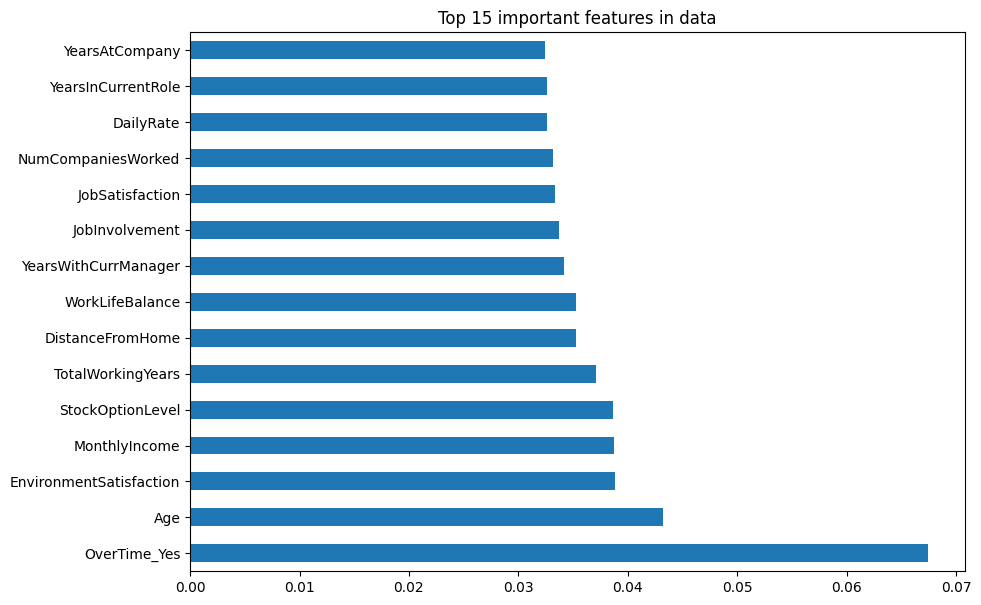

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,7))
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features in data")
plt.show()

### Logistic Regression Model

**Importing Packages**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
count_attrition = df['Attrition_Yes'].value_counts()

print("Number of Records with Negative Attrition:", count_attrition[0])
print("Number of Records with Positive Attrition:", count_attrition[1])


Number of Records with Negative Attrition: 1233
Number of Records with Positive Attrition: 237


We observe an imbalanced class proportion of 5:1 in negative to positive attrition. Since there are many more instances of negative attrition, the model may be biased towards predicting this. There could be a tendency to predict the dominant class more frequently. The minority class (positive attrition) may receive less attention during the training process due to its lower presence in the dataset. This could result in a model less sensitive to specific patterns of the minority class.

**Split into Train Set and Test Set**

The test set will be composed of 30% of the data, and the train set will be 70%.

In [ ]:
x=X_kbest_features
x.shape

(1470, 15)

In [ ]:
y.shape

(1470,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

**Logistic Regression**

In [ ]:
# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

Training accuracy : 0.8406219630709426
Testing accuracy : 0.854875283446712
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       1.00      0.09      0.16        70

    accuracy                           0.85       441
   macro avg       0.93      0.54      0.54       441
weighted avg       0.88      0.85      0.80       441



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
df_results = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

# Add a Column Indicating if Predictions are Equal or Different
df_results['Equal'] = (df_results['Real'] == df_results['Predicted'])

# Print DataFrame
print(df_results)

print(df_results['Equal'].value_counts())
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_pred,y_test))

      Real  Predicted  Equal
442      0          0   True
1091     0          0   True
981      1          0  False
785      0          0   True
1332     1          1   True
...    ...        ...    ...
817      0          0   True
399      0          0   True
458      0          0   True
406      0          0   True
590      0          0   True

[441 rows x 3 columns]
True     377
False     64
Name: Equal, dtype: int64
Logistic Regression accuracy =  0.854875283446712


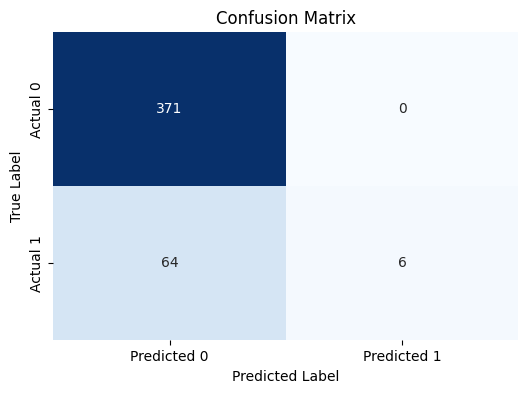

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
exactitud= accuracy_score(y_test, y_pred)
exactitud

0.854875283446712

An 85.5% accuracy was achieved in the predictions.

In [ ]:
precision= precision_score(y_test, y_pred)
precision

1.0

All negative cases were detected with 100% accuracy.

In [ ]:
recall= recall_score(y_test, y_pred)
recall

0.08571428571428572

Only 0.08% of positive cases were detected.

In [ ]:
f1_score= f1_score(y_test, y_pred)
f1_score

0.15789473684210528


An F1-score of 0.15 was obtained. Such a low value could be due to various issues, such as severe imbalance in the class distribution or insufficient patterns belonging to the minority class to adequately represent its distribution. It is recommended to consider specific techniques for handling imbalanced datasets, such as adjusting class weights or using resampling techniques.

### Handling Imbalanced Data

**Penalized logistic regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler


from collections import Counter

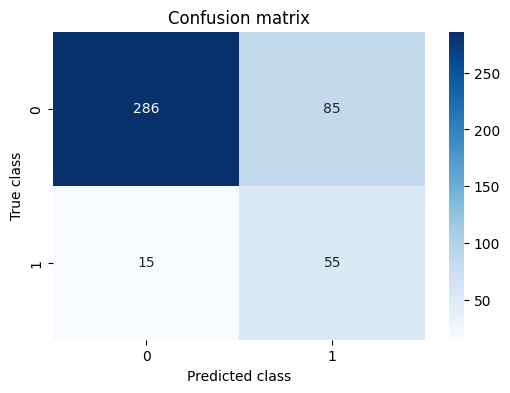

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       371
           1       0.39      0.79      0.52        70

    accuracy                           0.77       441
   macro avg       0.67      0.78      0.69       441
weighted avg       0.86      0.77      0.80       441



In [ ]:
rcParams['figure.figsize'] = 14, 8.7
LABELS = [0,1]

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,cmap='Blues', annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

model = run_model_balanced(x_train, x_test, y_train, y_test)
pred_y = model.predict(x_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
exactitud = accuracy_score(y_test, pred_y)
print("Exactitud:")
print(exactitud)

precision = precision_score(y_test, pred_y)
print("Precision:")
print(precision)

recall = recall_score(y_test, pred_y)
print("Recall:")
print(recall)

f1 = f1_score(y_test, pred_y)
print("F1 Score:")
print(f1)

Exactitud:
0.7732426303854876
Precision:
0.39285714285714285
Recall:
0.7857142857142857
F1 Score:
0.5238095238095237


**Oversampling of the Minority Class**

In [ ]:
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(max_iter=2000, C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

Distribution before resampling Counter({0: 862, 1: 167})
Distribution labels after resampling Counter({0: 862, 1: 431})


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



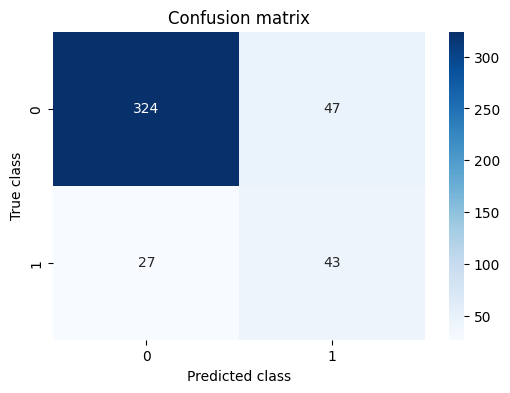

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       371
           1       0.48      0.61      0.54        70

    accuracy                           0.83       441
   macro avg       0.70      0.74      0.72       441
weighted avg       0.85      0.83      0.84       441



In [ ]:
os = RandomOverSampler(sampling_strategy=0.5)
X_train_res, y_train_res = os.fit_resample(x_train, y_train)

print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, x_test, y_train_res, y_test)
pred_y = model.predict(x_test)
mostrar_resultados(y_test, pred_y)

**Subsampling of the majority class**

Distribution before resampling Counter({0: 862, 1: 167})
Distribution after resampling Counter({0: 334, 1: 167})


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



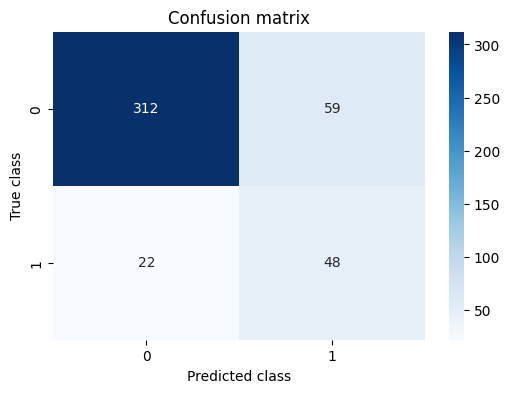

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       371
           1       0.45      0.69      0.54        70

    accuracy                           0.82       441
   macro avg       0.69      0.76      0.71       441
weighted avg       0.86      0.82      0.83       441



In [ ]:
us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(x_train, y_train)

print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, x_test, y_train_res, y_test)
pred_y = model.predict(x_test)
mostrar_resultados(y_test, pred_y)

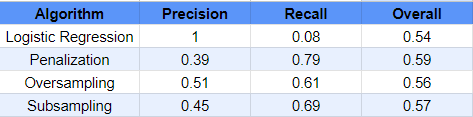

We see that in this case, the Penalization strategy gives us the best result, with a recall of 0.79. It is true that False Positives increase, and 85 samples have been labeled as positive when they were not. But what is better? Having to manually review those cases or failing to detect true cases of positive attrition?

## Conclusion


> This study on employee attrition in the business environment revealed that factors such as job satisfaction, overtime, work-life balance, and the employee's monthly rate are crucial in predicting who is more likely to leave the organization. Using a Logistic Regression model with the Penalty strategy, we achieved a detection of positive attrition cases (recall) of 79%. Based on the results, we recommend the company to focus on improving work-life balance, addressing overtime issues, and strengthening policies that promote satisfaction in the workplace. We removed ethically sensitive variables and acknowledge inherent limitations in prediction. For future research, exploring retention strategies specific to different employee segments is suggested. In practical terms, this can benefit the organization by enhancing retention and strategic decision-making in human resources.